# Wine chemical analysis dataset.
In this notebook a wine chemical dataset is analyzed. Semi-supervised learning and model evaluation are examined.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# First Part
In the 1st part we will work with a dataset that has missing labels and will try to fill some of them with predictions.

In [3]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


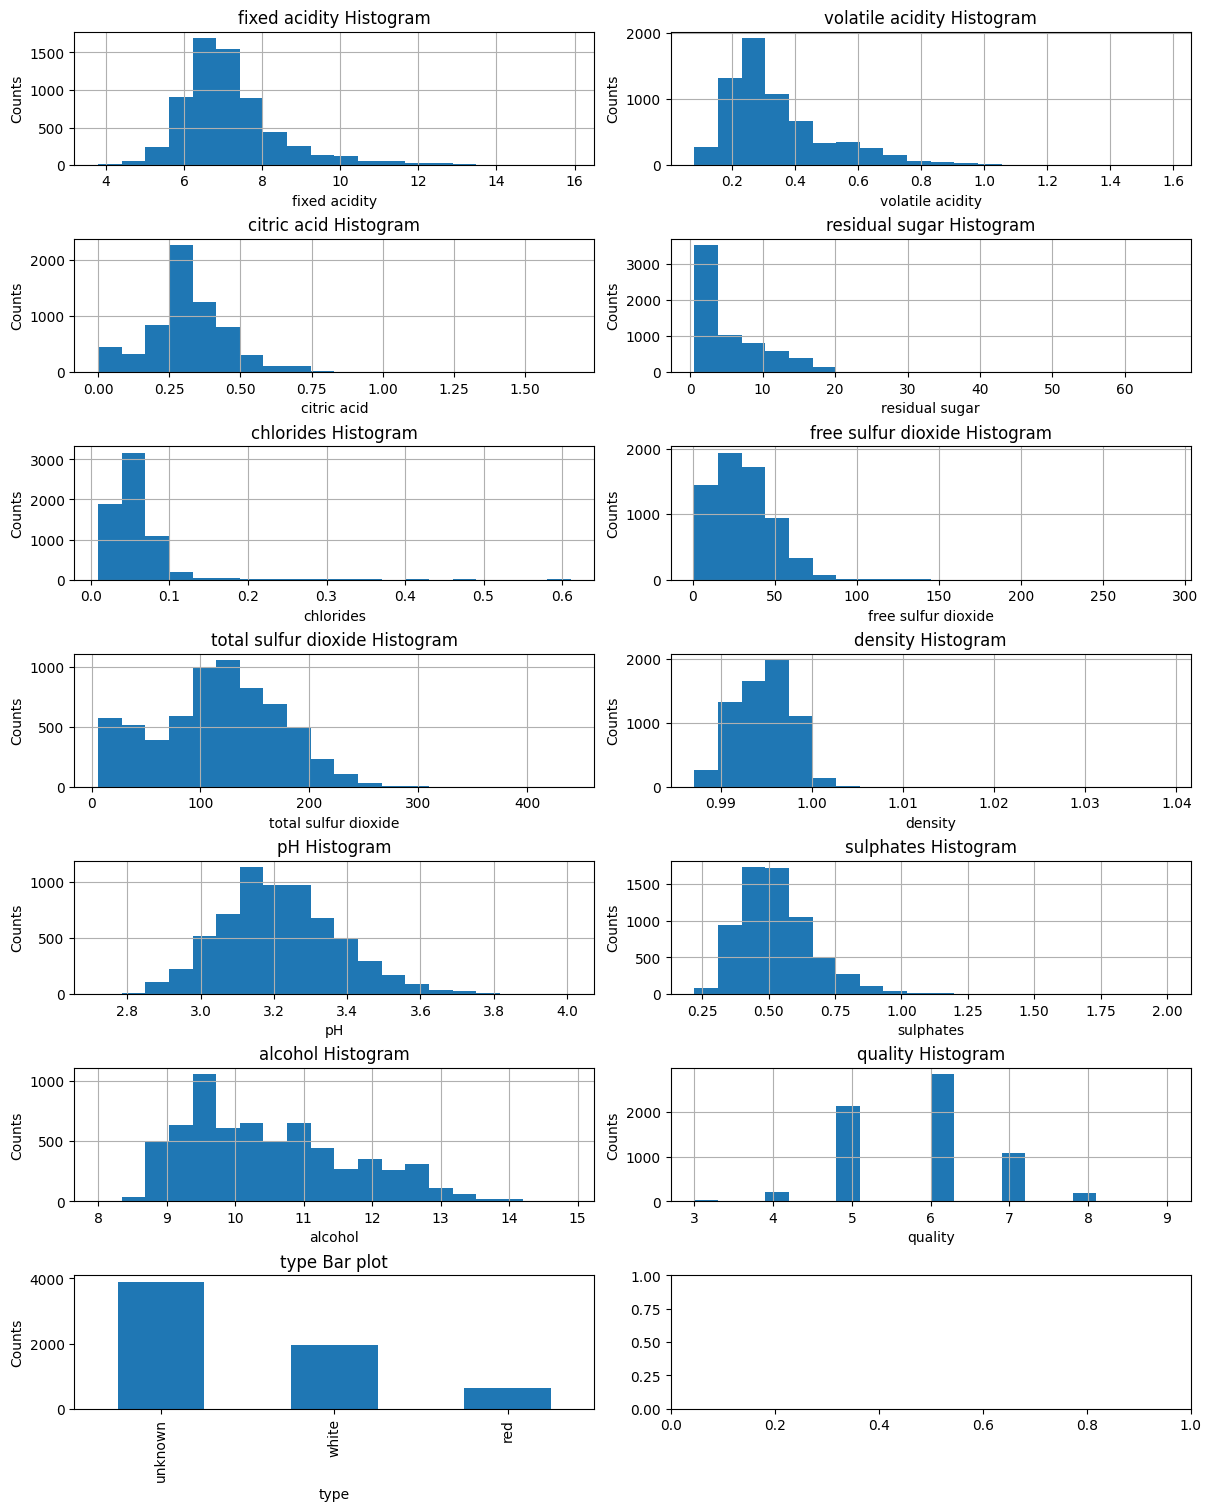

In [5]:
fig, axes = plt.subplots(7,2, figsize = (12,15),constrained_layout=True)

plt.subplot(7,2,1)
df['fixed acidity'].hist(bins=20)
plt.title('fixed acidity Histogram')
plt.xlabel('fixed acidity')
plt.ylabel('Counts')

plt.subplot(7,2,2)
df['volatile acidity'].hist(bins=20)
plt.title('volatile acidity Histogram')
plt.xlabel('volatile acidity')
plt.ylabel('Counts')

plt.subplot(7,2,3)
df['citric acid'].hist(bins=20)
plt.title('citric acid Histogram')
plt.xlabel('citric acid')
plt.ylabel('Counts')

plt.subplot(7,2,4)
df['residual sugar'].hist(bins=20)
plt.title('residual sugar Histogram')
plt.xlabel('residual sugar')
plt.ylabel('Counts')

plt.subplot(7,2,5)
df['chlorides'].hist(bins=20)
plt.title('chlorides Histogram')
plt.xlabel('chlorides')
plt.ylabel('Counts')

plt.subplot(7,2,6)
df['free sulfur dioxide'].hist(bins=20)
plt.title('free sulfur dioxide Histogram')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Counts')

plt.subplot(7,2,7)
df['total sulfur dioxide'].hist(bins=20)
plt.title('total sulfur dioxide Histogram')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Counts')

plt.subplot(7,2,8)
df['density'].hist(bins=20)
plt.title('density Histogram')
plt.xlabel('density')
plt.ylabel('Counts')

plt.subplot(7,2,9)
df['pH'].hist(bins=20)
plt.title('pH Histogram')
plt.xlabel('pH')
plt.ylabel('Counts')

plt.subplot(7,2,10)
df['sulphates'].hist(bins=20)
plt.title('sulphates Histogram')
plt.xlabel('sulphates')
plt.ylabel('Counts')

plt.subplot(7,2,11)
df['alcohol'].hist(bins=20)
plt.title('alcohol Histogram')
plt.xlabel('alcohol')
plt.ylabel('Counts')

plt.subplot(7,2,12)
df['quality'].hist(bins=20)
plt.title('quality Histogram')
plt.xlabel('quality')
plt.ylabel('Counts')

plt.subplot(7,2,13)
df['type'].value_counts().plot.bar()
plt.title('type Bar plot')
plt.xlabel('type')
plt.ylabel('Counts')
plt.show()

In [6]:
df['type'] = df['type'].replace('white', 0)
df['type'] = df['type'].replace('red', 1)
df['type'] = df['type'].replace('unknown', 2)
df

/tmp/ipython-input-1102709123.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace('unknown', 2)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df_copy = df.dropna()

In [8]:
df_known = df_copy[df_copy['type']!=2]
input_df = df_known.drop(columns=['type'])
targets_df = df_known['type']

x_known = input_df.to_numpy()
y_known = targets_df.to_numpy()
x_known.shape, y_known.shape

((2591, 12), (2591,))

In [9]:
df_unknown = df_copy[df_copy['type']==2]
indices = df_copy.index[df_copy['type'] == 2].tolist()
print(f'Number of unknown observations: {len(indices)}')
input_df = df_unknown.drop(columns=['type'])
targets_df = df_unknown['type']

x_unknown = input_df.to_numpy()
y_unknown = targets_df.to_numpy()
x_unknown.shape, y_unknown.shape

Number of unknown observations: 3872


((3872, 12), (3872,))

In [10]:
df_copy.loc[indices]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
3,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,2,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,2,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,2,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6490,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,2,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6


In [12]:
seed = 42
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size=test_size, random_state=seed,stratify=y_known)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1813, 12), (1813,), (778, 12), (778,))

In [13]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)*100
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
print(f'Train: Acc={train_accuracy:.2f}, Precision={train_prec:.2f}, Recall={train_rec:.2f}, f1={train_f1:.2f}')

y_pred_test = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)*100
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f'Test: Acc={test_accuracy:.2f}, Precision={test_prec:.2f}, Recall={test_rec:.2f}, f1={test_f1:.2f}')


Train: Acc=99.94, Precision=1.00, Recall=1.00, f1=1.00
Test: Acc=99.74, Precision=1.00, Recall=0.99, f1=0.99


We can see that the metrics are high. In this specific case, the dataset is not balanced, which means that the white wine labels are way more than the red ones. Thus, we need a metric that can take this into account and by definition f1 is more trustworthy than accuracy.

Below, we will set class_weight=balanced so as to balance the dataset.

In [14]:
clf = RandomForestClassifier(random_state=42,class_weight='balanced')
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)*100
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
print(f'Train: Acc={train_accuracy:.2f}, Precision={train_prec:.2f}, Recall={train_rec:.2f}, f1={train_f1:.2f}')

y_pred_test = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)*100
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f'Test: Acc={test_accuracy:.2f}, Precision={test_prec:.2f}, Recall={test_rec:.2f}, f1={test_f1:.2f}')

Train: Acc=99.94, Precision=1.00, Recall=1.00, f1=1.00
Test: Acc=99.87, Precision=1.00, Recall=0.99, f1=1.00


# Fill missing values with probabilities

In the following cells we will try to use predictions to fill missing labels. We will re run this procedure until the probabilities are neither close to 0 nor 1. Specifically, we will merge some of our predicted labels into the training set and we will repeat this procedure.

In [15]:
y_unknown_proba = clf.predict_proba(x_unknown)

In [16]:
red_preds = y_unknown_proba[:,1]
white_preds = y_unknown_proba[:,0]

y_un_pred = np.full(x_unknown.shape[0],2)
y_un_pred[red_preds>0.65]=1
y_un_pred[red_preds<0.35]=0

In [17]:
new_labels = y_un_pred !=2
x_known_updated = np.vstack([x_train,x_unknown[new_labels]])
y_known_updated = np.concatenate([y_train,y_un_pred[new_labels]])

x_known_updated.shape , x_known.shape , y_known_updated.shape , y_known.shape, x_unknown.shape

((5636, 12), (2591, 12), (5636,), (2591,), (3872, 12))

In [18]:
x_unknown = x_unknown[~new_labels]
x_unknown.shape

(49, 12)

In [19]:
number_of_reruns=0

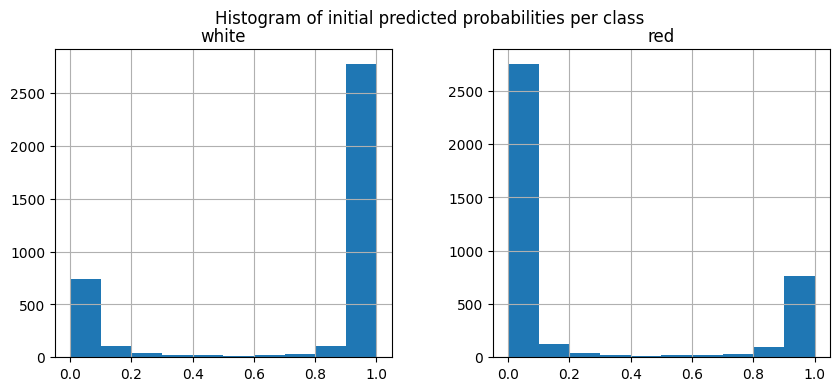

In [21]:
df_probs = pd.DataFrame(y_unknown_proba, columns=['white', 'red'])
df_probs.hist(bins=10, figsize=(10,4))
plt.suptitle("Histogram of initial predicted probabilities per class")
plt.show()

Train: Acc=99.98, Precision=1.00, Recall=1.00, f1=1.00
Test: Acc=99.87, Precision=1.00, Recall=0.99, f1=1.00
(5666, 12) (2591, 12) (5666,) (2591,) (19, 12)
Number of unknowns: (19, 12)
Number of reruns:  7


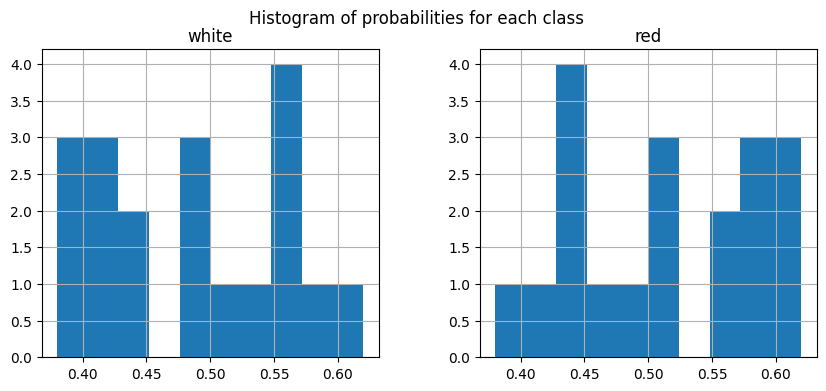

In [28]:
number_of_reruns = number_of_reruns+1
clf = RandomForestClassifier(random_state=42,class_weight='balanced')

#x_train, x_test, y_train, y_test = train_test_split(x_known_updated, y_known_updated, test_size=test_size, random_state=seed,stratify=y_known_updated)
x_train = x_known_updated
y_train = y_known_updated
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)*100
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
print(f'Train: Acc={train_accuracy:.2f}, Precision={train_prec:.2f}, Recall={train_rec:.2f}, f1={train_f1:.2f}')
y_pred_test = clf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)*100
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f'Test: Acc={test_accuracy:.2f}, Precision={test_prec:.2f}, Recall={test_rec:.2f}, f1={test_f1:.2f}')

y_unknown_proba = clf.predict_proba(x_unknown)
red_preds = y_unknown_proba[:,1]
white_preds = y_unknown_proba[:,0]

y_un_pred = np.full(x_unknown.shape[0],2)
y_un_pred[red_preds>0.65]=1
y_un_pred[red_preds<0.35]=0

new_labels = y_un_pred !=2
x_known_updated = np.vstack([x_train,x_unknown[new_labels]])
y_known_updated = np.concatenate([y_train,y_un_pred[new_labels]])

print(x_known_updated.shape , x_known.shape , y_known_updated.shape , y_known.shape, x_unknown.shape)
x_unknown = x_unknown[~new_labels]
print(f'Number of unknowns: {x_unknown.shape}')
print('Number of reruns: ',number_of_reruns)

df_probs = pd.DataFrame(y_unknown_proba, columns=['white', 'red'])
df_probs.hist(bins=10, figsize=(10,4))
plt.suptitle("Histogram of probabilities for each class")
plt.show()


We can see that the probabilities are now not marginal, after many reruns of the above code.

# Second Part
In the second part of the study we will use the full dataset to predict wine quality.

In [29]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


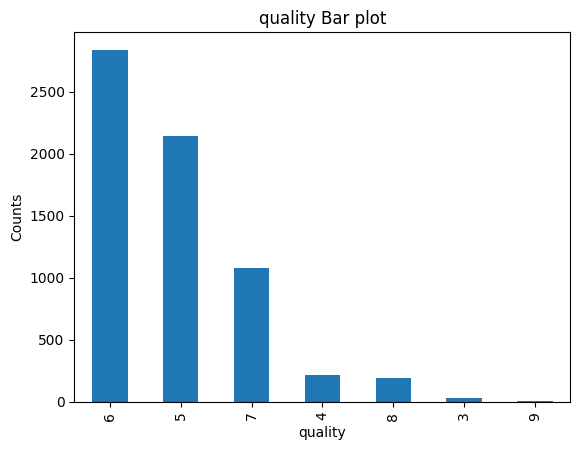

In [30]:
df['quality'].value_counts().plot.bar()
plt.title('quality Bar plot')
plt.xlabel('quality')
plt.ylabel('Counts')
plt.show()

The quality score is not balanced, since most of the observation have quality between 5-7 and very few of them have values like 3 or 9.

In [31]:
df['type'] = df['type'].replace('white', 0)
df['type'] = df['type'].replace('red', 1)
df['type'] = df['type'].replace('unknown', 2)
df_red = df[df['type']==1]
df_white = df[df['type']==0]

/tmp/ipython-input-3525614374.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace('red', 1)


# Which is of higher quality: red or white wine?

We can see from the following scatter plot and  histograms that white quality seems to be marginally higher than red, as indicated from the mean values as well.

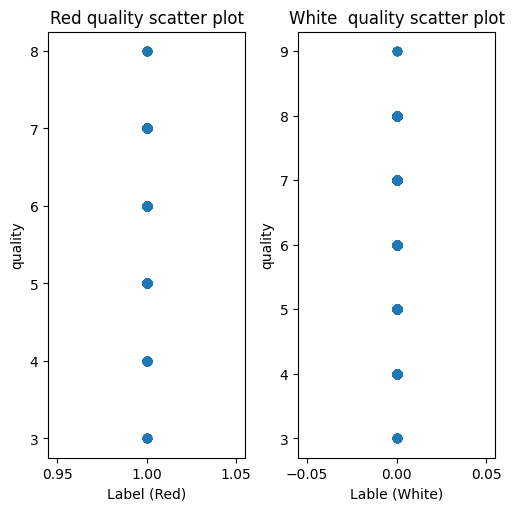

In [32]:
fig, axes = plt.subplots(1,2, figsize = (5,5),constrained_layout=True)

plt.subplot(1,2,1)
plt.scatter(df_red['type'],df_red['quality'])
plt.title('Red quality scatter plot')
plt.xlabel('Label (Red)')
plt.ylabel('quality')

plt.subplot(1,2,2)
plt.scatter(df_white['type'],df_white['quality'])
plt.title('White  quality scatter plot')
plt.xlabel('Lable (White)')
plt.ylabel('quality')

plt.show()

In [33]:
df_red['quality'].mean() , df_white['quality'].mean()

(np.float64(5.6360225140712945), np.float64(5.87790935075541))

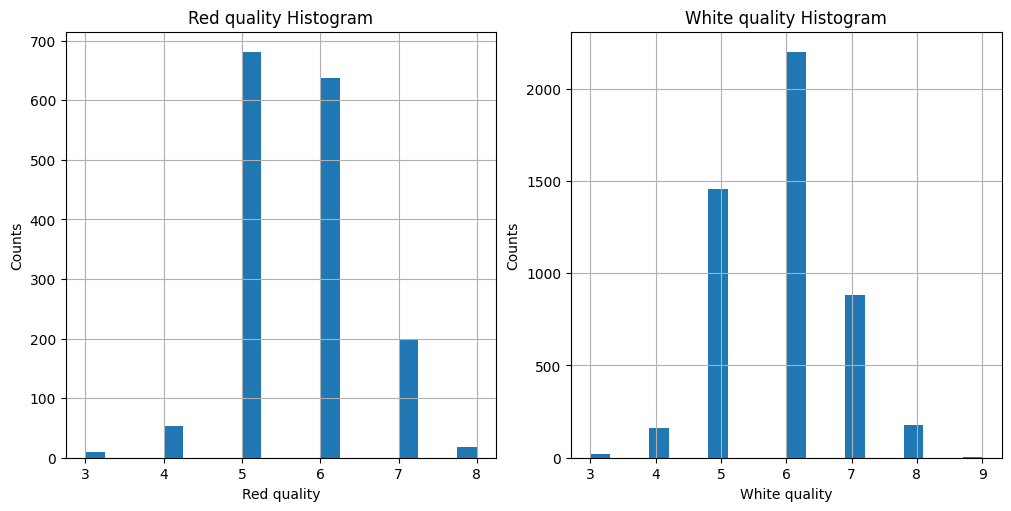

In [34]:
fig, axes = plt.subplots(1,2, figsize = (10,5),constrained_layout=True)

plt.subplot(1,2,1)
df_red['quality'].hist(bins=20)
plt.title('Red quality Histogram')
plt.xlabel('Red quality')
plt.ylabel('Counts')

plt.subplot(1,2,2)
df_white['quality'].hist(bins=20)
plt.title('White quality Histogram')
plt.xlabel('White quality')
plt.ylabel('Counts')

plt.show()

With these two histograms we can verify the fact tht white wine seems to have observations with higher quality.

# Which is of higher quality: sweet or dry wine?

From the below scatter plot we can see that higher residual sugar may indicate lower quality. Thus, dry wine should be better. However, there is not a clear indication as there are some observations with relatively high sugar and quality.

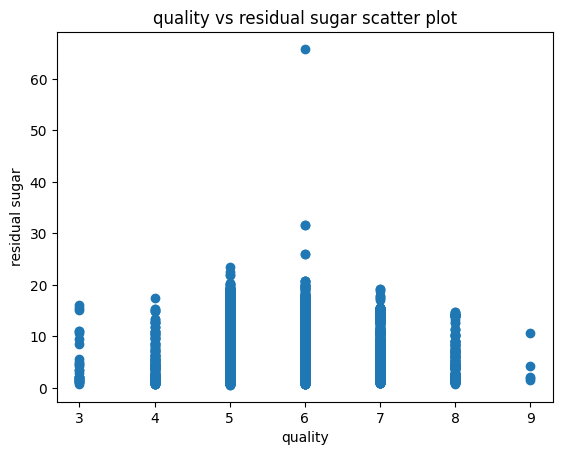

In [35]:
plt.scatter(df['quality'],df['residual sugar'])
plt.title('quality vs residual sugar scatter plot')
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()

In [36]:
input_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6487,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6490,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6


In [47]:
df = df.dropna()
df['type'] = df['type'].replace('white', 0)
df['type'] = df['type'].replace('red', 1)
input_df = df.drop(columns=['quality'])
targets_df = df['quality']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5816, 12), (647, 12), (5816,), (647,))

We will train a DecisionTreeRegressor to predict wine quality.

In [48]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred = regressor.predict(x_test)
mae = mean_absolute_error(y_test, pred)
print(f'DecisionTreeRegressorr: Test MAE:{mae:.2f} ')

DecisionTreeRegressorr: Test MAE:0.03 


In [49]:
mae_list = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=i)
    regressor = DecisionTreeRegressor(random_state=i)
    regressor.fit(x_train, y_train)
    pred = regressor.predict(x_test)
    mae = mean_absolute_error(y_test, pred)
    mae_list.append(mae)

mae_mean = np.array(mae_list).mean()
mae_std = np.array(mae_list).std()
print(f'DecisionTreeRegressorr: Avg MAE:{mae_mean:2f} , std MAE: {mae_std:2f}')

DecisionTreeRegressorr: Avg MAE:0.463369 , std MAE: 0.026760


From the Avg MAE and its std we can guess how the model performs relatively to the scale of the data. As we see, the std of the MAE is very low compared to the MAE which is and indication that the model may be performing well.

We will now try to select a few hpyer parameters. For this we will spit the datset into training, validation and testing set.

In [51]:
input_df = df.drop(columns=['quality'])
targets_df = df['quality']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=0)
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape , y_test.shape

((4524, 12), (1292, 12), (647, 12), (4524,), (1292,), (647,))

Let's make sure that the size of the subsets correspond to a 70-20-10 split.

In [52]:
len(x) , round(0.7*len(x)) , round(0.2*len(x)) , round(0.1*len(x))

(6463, 4524, 1293, 646)

We will test some hyperparameter combinations (more than 15 for more options).

Selecting hyperparameters base on the metrics of the training set is far from ideal since we would cause the model to overfit. It could also be seen as 'cheating' since we help the model perform better with information that is should not have access to.

In [53]:

criterions = ['squared_error', 'friedman_mse','absolute_error']
max_depths = [None, 3, 5,8,10]

result_df_columns = ['train_MAE' , 'val_MAE', 'criterion' ,'max_depth']
results_df = pd.DataFrame(columns=result_df_columns)
seed = 0
for cri in criterions:
  for depth in max_depths:
    x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=0)

    regressor = DecisionTreeRegressor(random_state=seed,criterion=cri, max_depth=depth)
    regressor.fit(x_train, y_train)

    y_pred_train = regressor.predict(x_train)
    train_accuracy = mean_absolute_error(y_train, y_pred_train)

    y_pred_val = regressor.predict(x_val)
    val_accuracy = mean_absolute_error(y_val, y_pred_val)

    #y_pred_test = regressor.predict(x_test)
    #test_accuracy = mean_absolute_error(y_test, y_pred_test)

    new_item = {'train_MAE':train_accuracy , 'val_MAE':val_accuracy, 'criterion': cri,'max_depth':depth}
    temp_df = pd.DataFrame([new_item])
    results_df = pd.concat([results_df,temp_df])


results_df

/tmp/ipython-input-4088553459.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df,temp_df])


,train_MAE,val_MAE,criterion,max_depth
0,0.000000,0.507740,squared_error,None
0,0.594832,0.584011,squared_error,3
0,0.541226,0.553972,squared_error,5
0,0.446821,0.559983,squared_error,8
0,0.339604,0.558714,squared_error,10
0,0.000000,0.507740,friedman_mse,None
0,0.594832,0.584011,friedman_mse,3
0,0.541226,0.553972,friedman_mse,5
0,0.446821,0.559983,friedman_mse,8
0,0.339604,0.558714,friedman_mse,10


In [54]:
min_error = results_df['val_MAE'].min()
row = results_df[results_df['val_MAE']==min_error]
row

,train_MAE,val_MAE,criterion,max_depth
0,0.513484,0.498452,absolute_error,3


We will do the same but with GridSearchCV.

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
parameters = {'criterion':criterions,'max_depth':max_depths}
regressor = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(estimator=regressor, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(f'Best parameters: {grid_search.best_params_} \nLowest MAE: {-grid_search.best_score_}')


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': None} 
Lowest MAE: 0.4797079333534432


Comparing the two methods, it is better to find hyperparameters based on the validation set. In addition, GridSearchCV allows to do this many times, so as to ensure that these hyperparameters are not chosen by chance, but are representative of the dataset.

In [56]:
selected_model = grid_search.best_estimator_
y_pred = selected_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Best DecisionTreeRegressor based on GridSearchCV: Test MAE:{test_mae:.2f} ')

Best DecisionTreeRegressor based on GridSearchCV: Test MAE:0.44 


We will do the same but with a fixed max depth = 5. For this purpose some other possible hyperparameters are tested.

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
min_samples_leaf_options = [1,2,3,4,5]
parameters = {'criterion':criterions,'min_samples_leaf':min_samples_leaf_options}
regressor = DecisionTreeRegressor(random_state=0,max_depth=5)
grid_search = GridSearchCV(estimator=regressor, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(f'Best parameters: {grid_search.best_params_} \nLowest MAE: {-grid_search.best_score_}')

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Best parameters: {'criterion': 'absolute_error', 'min_samples_leaf': 4} 
Lowest MAE: 0.5235009671179884


The best method seems to be the GridSearchCV, as it finds the optimal combination of hpyreparameters with many folds of the data, which increases its reliability.

In [59]:
selected_model = grid_search.best_estimator_
y_pred = selected_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Best DecisionTreeRegressor with max_depth=5 based on GridSearchCV: Test MAE:{test_mae:.2f} ')

Best DecisionTreeRegressor with max_depth=5 based on GridSearchCV: Test MAE:0.50 


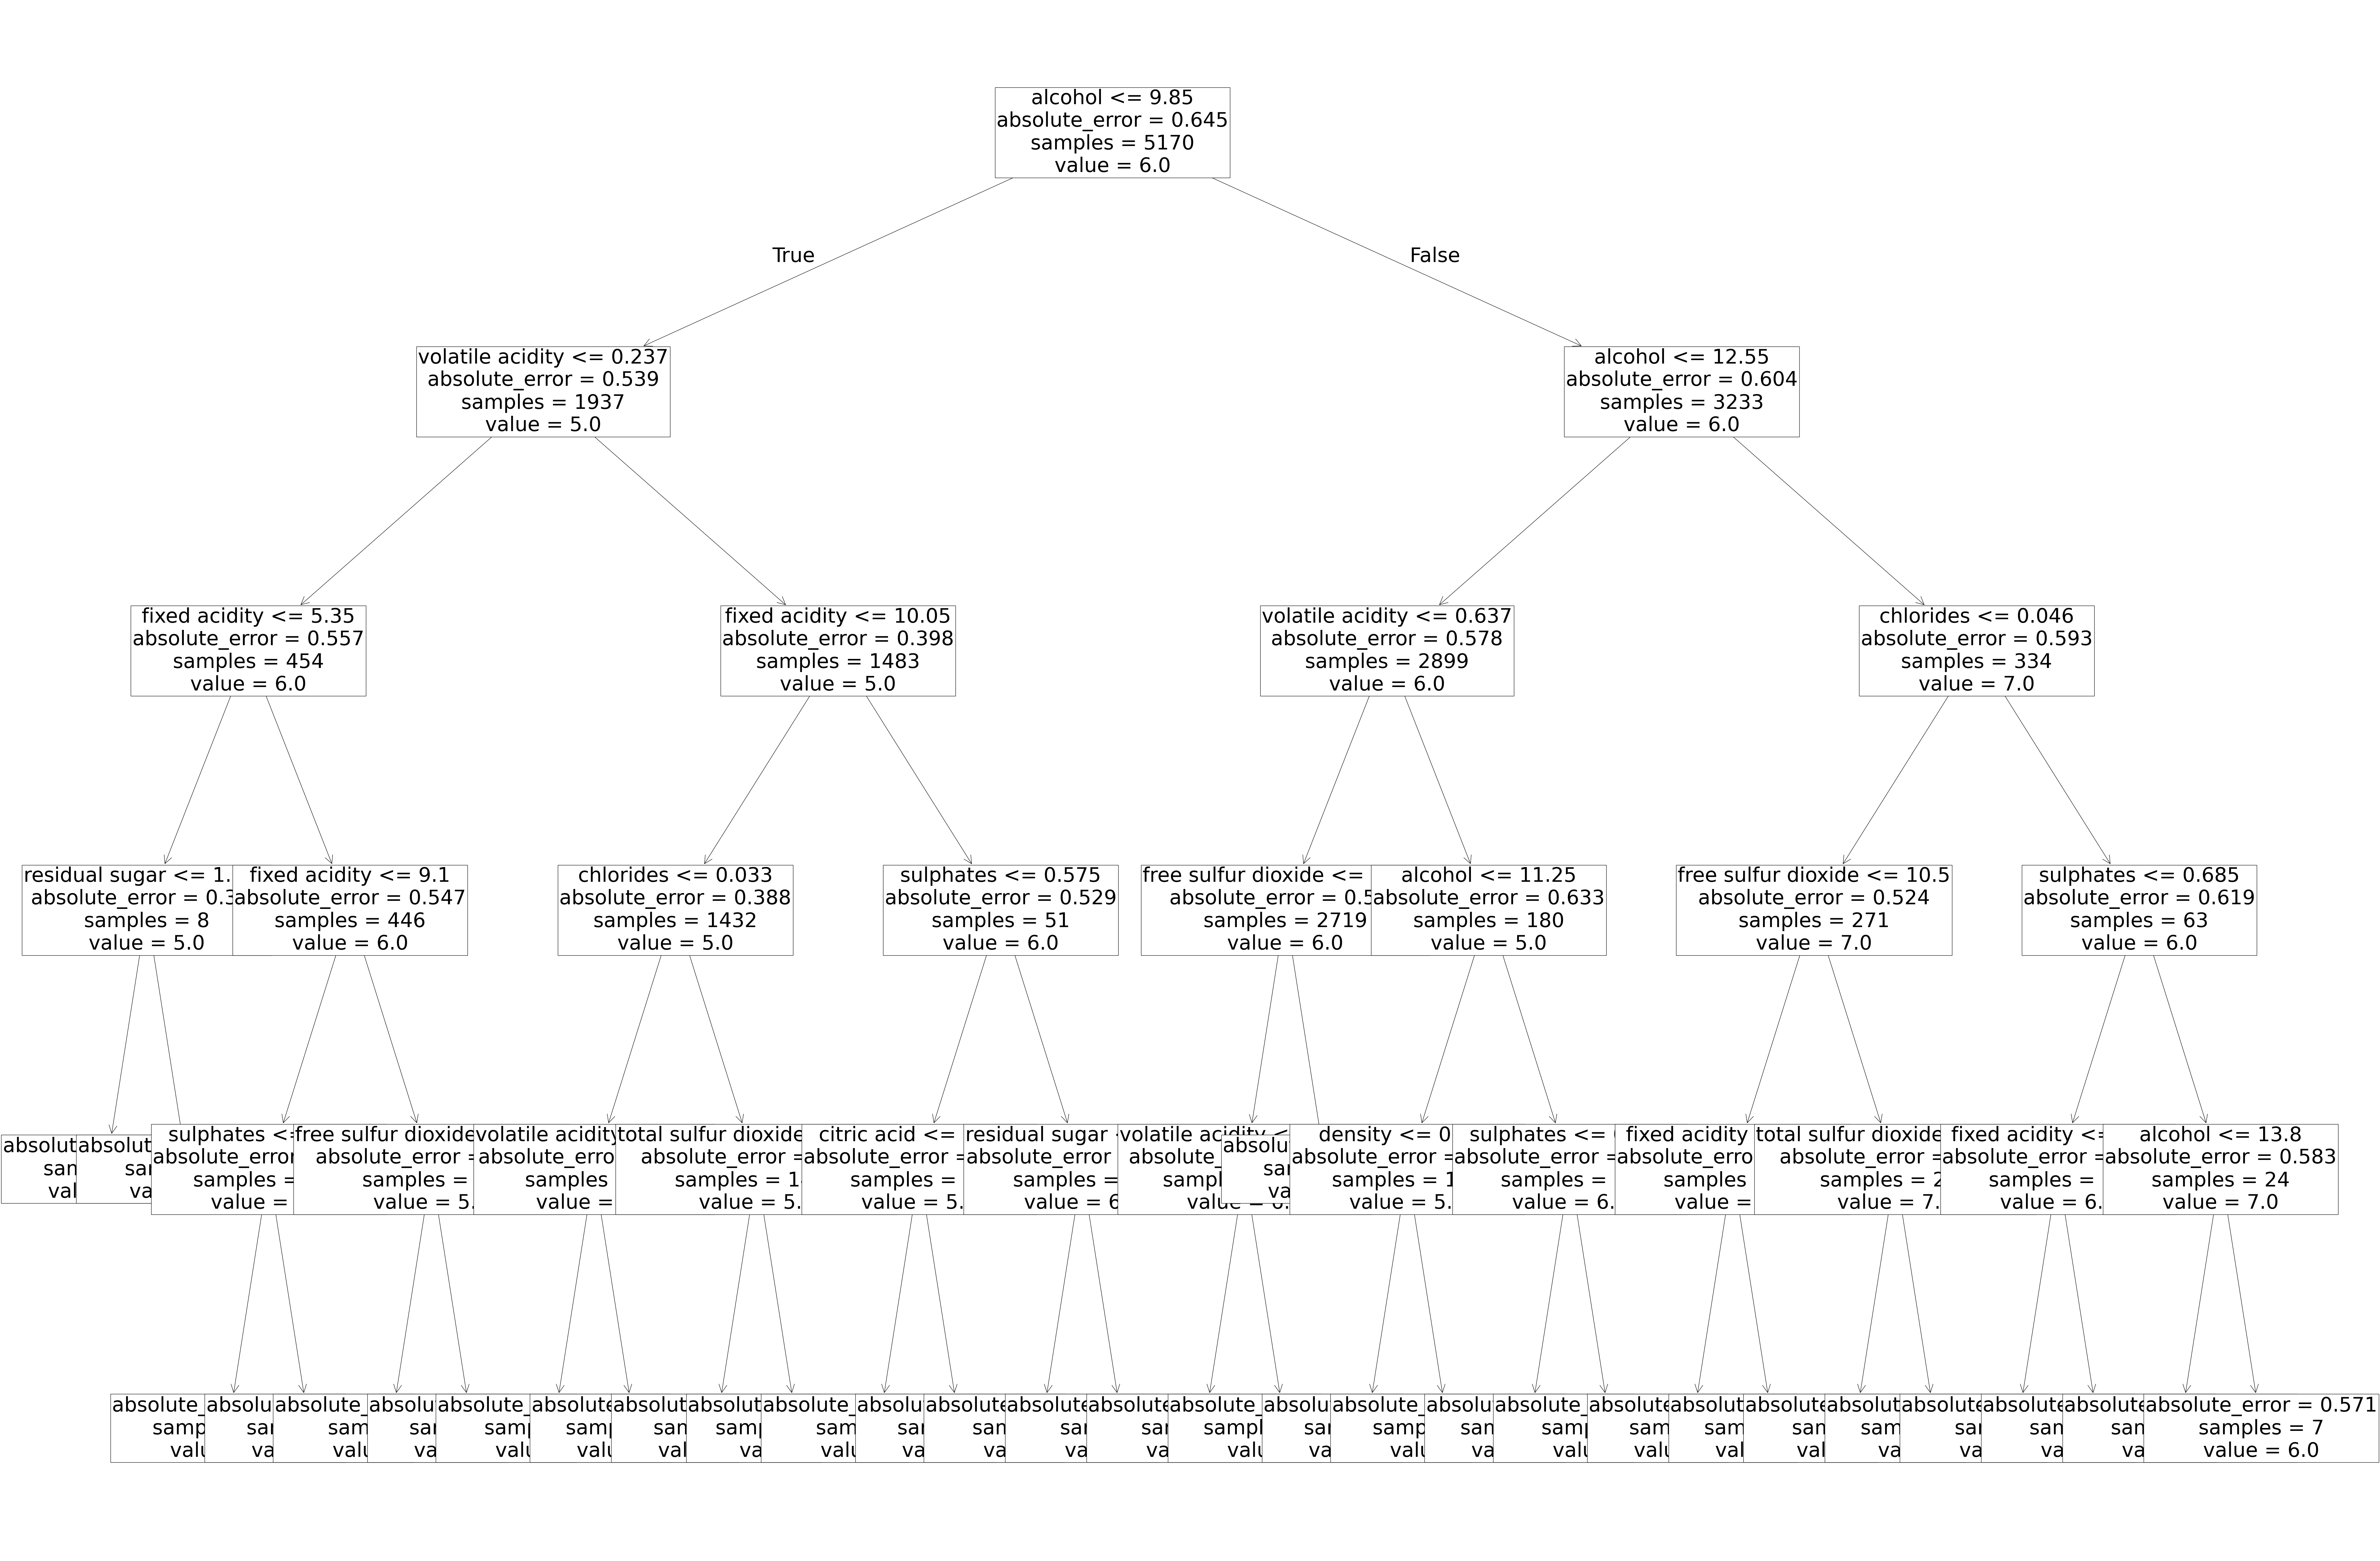

In [60]:
plt.figure(figsize=(100,70))
tree.plot_tree(selected_model,feature_names = input_df.columns,fontsize=50)
plt.show()

We can see that alcohol contrentration plays a significant part in the quality of the wine. Lower alcohol probably means higher quality.

In [61]:
importances = selected_model.feature_importances_
importances

array([0.        , 0.02685422, 0.31585678, 0.        , 0.00255754,
       0.02685422, 0.02557545, 0.00511509, 0.00383632, 0.        ,
       0.03452685, 0.55882353])

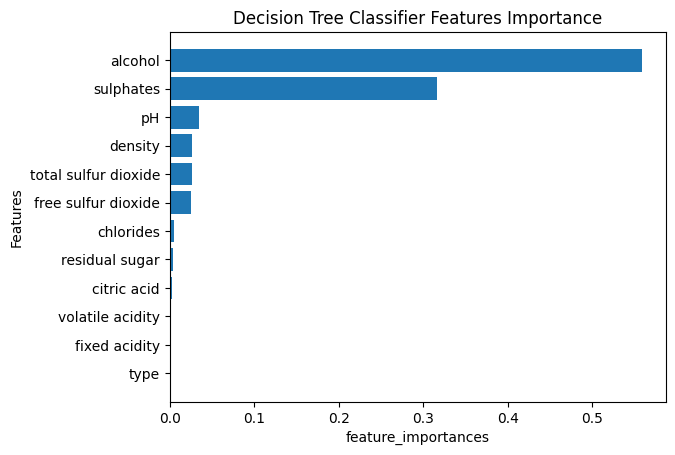

In [62]:
plt.barh(input_df.columns, np.sort(abs(importances)))
plt.title('Decision Tree Classifier Features Importance')
plt.xlabel('feature_importances')
plt.ylabel('Features')
plt.show()